<a href="https://colab.research.google.com/github/AngelRP8791/machine-learning-python-template/blob/main/Proy_Aprendiz_no_superv_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIbrería aplicable

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [2]:
url  = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [3]:
df = pd.read_csv(url)
trescolum = ["Latitude", "Longitude", "MedInc"]
X = df[trescolum].copy()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=scaler.get_feature_names_out(), index = df.index)
X_scaled.head()

,Latitude,Longitude,MedInc
0,1.052548,-1.327835,2.344766
1,1.043185,-1.322844,2.332238
2,1.038503,-1.332827,1.782699
3,1.038503,-1.337818,0.932968
4,1.038503,-1.337818,-0.012881


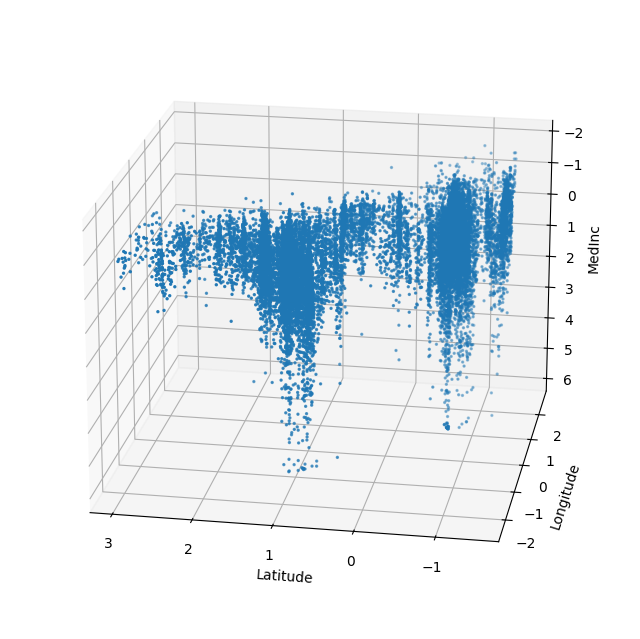

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled['Latitude'], X_scaled['Longitude'], X_scaled['MedInc'], s=2)
ax.set_xlabel('Latitude'); ax.set_ylabel('Longitude'); ax.set_zlabel('MedInc')
ax.view_init(200,80)

In [5]:
inercias = []
for i in range(1,23):
    kmeans = KMeans(n_clusters=i,
                init='k-means++',
                n_init=3,
                max_iter=300,
                random_state=42)
    kmeans.fit(X_scaled)
    inercias.append(kmeans.inertia_)

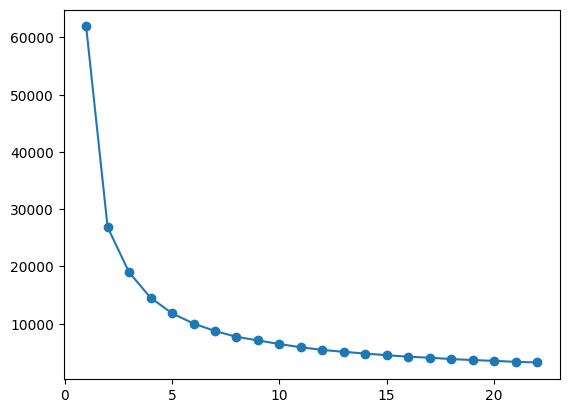

In [6]:
plt.plot(range(1,23), inercias, marker='o')

In [7]:
siluetas = []
for i in range(2,7):
  kmeans = KMeans(n_clusters=i,
                  init='k-means++',
                  n_init=3,
                  max_iter=300,
                  random_state=42)
  y_kmeans = kmeans.fit_predict(X_scaled)
  silhouette_vals = silhouette_samples(X_scaled, y_kmeans, metric='euclidean')
  silhouette_avg = np.mean(silhouette_vals)
  siluetas.append(silhouette_avg)

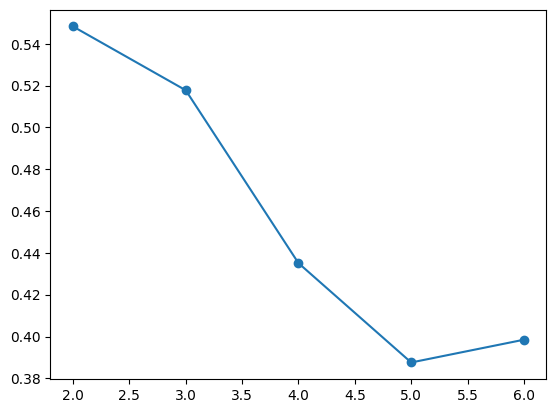

In [8]:
plt.plot(range(2,7),siluetas, marker='o')

In [9]:
kmeans = KMeans(n_clusters=2,
                init='k-means++',
                n_init=3,
                max_iter=300,
                random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=3, random_state=42)

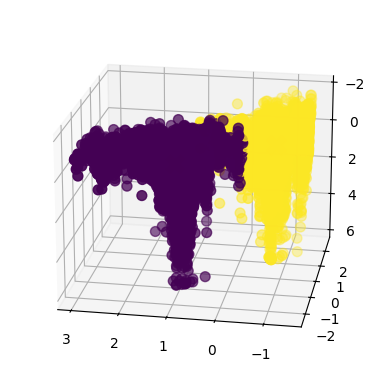

In [10]:
X_scaled_ = X_scaled.to_numpy()
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled_[:, 0], X_scaled_[:, 1], X_scaled_[:, 2], c=labels, s=50, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75, marker='X')
ax.view_init(200,80)

0.5665094919763786


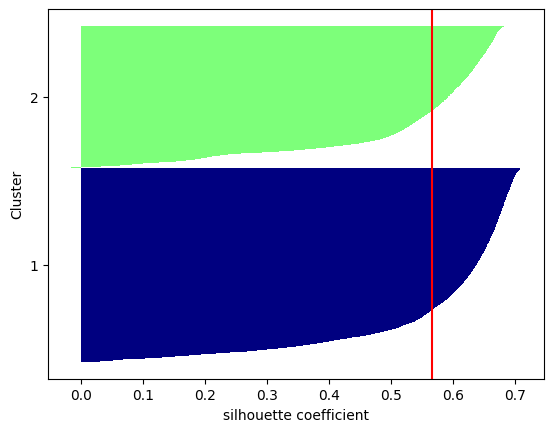

In [11]:
kmeans = KMeans(n_clusters=2,
                init='k-means++',
                n_init=3,
                max_iter=300,
                random_state=42)
y_km = kmeans.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_lower + len(c_silhouette_vals)), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper)/2.0)
  y_ax_lower += len(c_silhouette_vals)
  silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
print(silhouette_avg)